In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime

In [2]:
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv('Data Preprocessing HDB.csv')
df['month'] = pd.to_datetime(df['month'], format='%d/%m/%Y')
df.head()

,Unnamed: 0,month,town,flat_type,block,street_name,concat_address,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_quater,concat_for_rent,Median Rent,max_floor_lvl,commercial,miscellaneous,multistorey_carpark,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Latitude,Longitude,distance_nearest_school,number_of_school_with_2km,distance_nearest_hawker,number_of_hawker_with_2km,distance_nearest_supermarket,number_of_supermarket_with_2km,distance_nearest_train_station,number_of_train_station_with_2km,distance_to_cbd,distance_nearest_top_sec_sch,number_of_top_sec_sch_with_2km,gdp_growth_rate,unemployment_rate,cpi,sibor_3m,non_landed_private_property_price_index,2017_cooling_measures,2018_cooling_measures,2021_cooling_measures
0,0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,406 ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2017-Q1,2017-Q1ANG MO KIO2 ROOM,NaN,12,N,N,N,220,0,81,0,0,0,0,0,0,0,139,0,0,1.362005,103.853880,0.227902,21,0.186107,9,0.748674,16,1.007304,3,8.740633,1.285543,1,4.7,2.3,1.8,0.964908,1.0,0,0,0
1,1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,108 ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,12,Y,N,N,122,0,0,89,31,1,0,0,0,0,0,1,0,1.370966,103.838202,0.300986,18,0.405496,8,0.384099,14,1.271403,2,9.835487,0.519774,2,4.7,2.3,1.8,0.964908,1.0,0,0,0
2,2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,602 ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,12,N,N,N,150,0,0,124,22,1,3,0,0,0,0,0,0,1.380709,103.835368,0.506849,11,0.592425,6,0.860318,9,1.069723,2,10.948660,0.809241,1,4.7,2.3,1.8,0.964908,1.0,0,0,0
3,3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,465 ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,14,Y,N,N,206,0,0,176,26,1,1,0,0,0,0,2,0,1.366201,103.857201,0.518559,17,0.244530,8,0.526652,17,0.946888,3,9.223354,1.868843,1,4.7,2.3,1.8,0.964908,1.0,0,0,0
4,4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,601 ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,12,Y,Y,N,152,0,0,128,22,0,2,0,0,0,0,0,0,1.381041,103.835132,0.546443,11,0.617715,6,0.905482,9,1.092582,1,10.989224,0.842134,1,4.7,2.3,1.8,0.964908,1.0,0,0,0


In [4]:
del df['Unnamed: 0']

In [5]:
df['resale_price'] = df['resale_price']/df['floor_area_sqm']

In [6]:
# functions to clean string type data
def lease(string):
    split = string.split()
    remaining_lease = round(int(split[0]) + (int(split[2])/12 if len(split) == 4 else 0),2)
    return remaining_lease

def storey(string):
    split = string.split()
    storey = int((int(split[0]) + int(split[-1]))/2)
    return storey

In [7]:
# apply functions
df['remaining_lease'] = df['remaining_lease'].apply(lease)
df['storey'] = df['storey_range'].apply(storey)
df = df.drop(['storey_range'], axis = 1)

In [8]:
# replace Yes and No to 1 and 0
df[['miscellaneous', 'commercial', 'multistorey_carpark']] = df[['miscellaneous', 'commercial', 'multistorey_carpark']].replace(['Y', 'N'], [1,0])

In [9]:
transport = pd.read_csv('mrt_lrt_data.csv')
transport.head()

,station_name,type,lat,lng
0,Jurong East,MRT,1.333207,103.742308
1,Bukit Batok,MRT,1.349069,103.749596
2,Bukit Gombak,MRT,1.359043,103.751863
3,Choa Chu Kang,MRT,1.385417,103.744316
4,Yew Tee,MRT,1.397383,103.747523


In [10]:
df = pd.concat([df, pd.get_dummies(df['town'])], axis = 'columns')
df

,month,town,flat_type,block,street_name,concat_address,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_quater,concat_for_rent,Median Rent,max_floor_lvl,commercial,miscellaneous,multistorey_carpark,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Latitude,Longitude,distance_nearest_school,number_of_school_with_2km,distance_nearest_hawker,number_of_hawker_with_2km,distance_nearest_supermarket,number_of_supermarket_with_2km,distance_nearest_train_station,number_of_train_station_with_2km,distance_to_cbd,distance_nearest_top_sec_sch,number_of_top_sec_sch_with_2km,gdp_growth_rate,unemployment_rate,cpi,sibor_3m,non_landed_private_property_price_index,2017_cooling_measures,2018_cooling_measures,2021_cooling_measures,storey,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,GEYLANG,HOUGANG,JURONG EAST,JURONG WEST,KALLANG/WHAMPOA,MARINE PARADE,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,406 ANG MO KIO AVE 10,44.0,Improved,1979,61.33,5272.727273,2017-Q1,2017-Q1ANG MO KIO2 ROOM,NaN,12,0,0,0,220,0,81,0,0,0,0,0,0,0,139,0,0,1.362005,103.853880,0.227902,21,0.186107,9,0.748674,16,1.007304,3,8.740633,1.285543,1,4.7,2.3,1.8,0.964908,1.000000,0,0,0,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,108 ANG MO KIO AVE 4,67.0,New Generation,1978,60.58,3731.343284,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,12,1,0,0,122,0,0,89,31,1,0,0,0,0,0,1,0,1.370966,103.838202,0.300986,18,0.405496,8,0.384099,14,1.271403,2,9.835487,0.519774,2,4.7,2.3,1.8,0.964908,1.000000,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,602 ANG MO KIO AVE 5,67.0,New Generation,1980,62.42,3910.447761,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,12,0,0,0,150,0,0,124,22,1,3,0,0,0,0,0,0,1.380709,103.835368,0.506849,11,0.592425,6,0.860318,9,1.069723,2,10.948660,0.809241,1,4.7,2.3,1.8,0.964908,1.000000,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,465 ANG MO KIO AVE 10,68.0,New Generation,1980,62.08,3897.058824,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,14,1,0,0,206,0,0,176,26,1,1,0,0,0,0,2,0,1.366201,103.857201,0.518559,17,0.244530,8,0.526652,17,0.946888,3,9.223354,1.868843,1,4.7,2.3,1.8,0.964908,1.000000,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,601 ANG MO KIO AVE 5,67.0,New Generation,1980,62.42,3955.223881,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,12,1,1,0,152,0,0,128,22,0,2,0,0,0,0,0,0,1.381041,103.835132,0.546443,11,0.617715,6,0.905482,9,1.092582,1,10.989224,0.842134,1,4.7,2.3,1.8,0.964908,1.000000,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134640,2022-09-01,YISHUN,4 ROOM,512C,YISHUN ST 51,512C YISHUN ST 51,93.0,Model A,2017,94.00,5493.419355,2022-Q3,2022-Q3YISHUN4 ROOM,NaN,13,0,1,0,120,0,0,0,48,72,0,0,0,0,0,0,0,1.414958,103.842655,0.409101,5,1.136485,1,0.315535,9,1.109043,1,14.622899,4.681075,0,NaN,NaN,NaN,NaN,1.352765,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
134641,2022-09-01,YISHUN,4 ROOM,759,YISHUN ST 72,759 YISHUN ST 72,84.0,Simplified,1985,62.17,4702.380952,2022-Q3,2022-Q3YISHUN4 ROOM,NaN,12,1,0,0,132,0,0,0,132,0,0,0,0,0,0,0,0,1.426246,103.833234,0.350842,13,0.777123,1,0.093764,15,0.428491,2,15.966511,5.836047,0,NaN,NaN,NaN,NaN,1.352765,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [11]:
X = df.select_dtypes(include='number').drop(columns=['YISHUN','Median Rent', 'resale_price', 'gdp_growth_rate', 'unemployment_rate', 'cpi', 'sibor_3m'])
Y = df['resale_price'].values

In [12]:
# decide if these features can be dropped (justify) or need to one hot encode 
df.select_dtypes(exclude='number').columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'concat_address',
       'flat_model', 'year_quater', 'concat_for_rent'],
      dtype='object')

In [13]:
seed = 1
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [14]:
X_train.reset_index(inplace = True, drop = True)
X_test.reset_index(inplace = True, drop = True)

<b> Decision Trees

In [15]:
reg_tree = DecisionTreeRegressor(max_features = "sqrt", random_state = seed, max_leaf_nodes = 8)
reg_tree.fit(X_train, y_train)

DecisionTreeRegressor(max_features='sqrt', max_leaf_nodes=8, random_state=1)

In [16]:
features = X_train.columns
feature_importance = reg_tree.feature_importances_
print("Variables actually used in tree construction:\n", list(features[feature_importance != 0]))

Variables actually used in tree construction:
 ['floor_area_sqm', 'max_floor_lvl', 'distance_to_cbd', 'distance_nearest_top_sec_sch', 'non_landed_private_property_price_index']


[Text(0.5454545454545454, 0.9, 'distance_nearest_top_sec_sch <= 4.49\nsquared_error = 1754444.586\nsamples = 90212\nvalue = 4855.934'),
 Text(0.36363636363636365, 0.7, 'distance_to_cbd <= 8.208\nsquared_error = 2279070.78\nsamples = 44375\nvalue = 5202.579'),
 Text(0.2727272727272727, 0.5, 'floor_area_sqm <= 82.5\nsquared_error = 2839152.303\nsamples = 15577\nvalue = 6162.635'),
 Text(0.18181818181818182, 0.3, 'max_floor_lvl <= 24.5\nsquared_error = 2337887.202\nsamples = 6485\nvalue = 5389.123'),
 Text(0.09090909090909091, 0.1, 'squared_error = 1023329.114\nsamples = 5796\nvalue = 4998.786'),
 Text(0.2727272727272727, 0.1, 'squared_error = 1332500.522\nsamples = 689\nvalue = 8672.718'),
 Text(0.36363636363636365, 0.3, 'squared_error = 2465533.212\nsamples = 9092\nvalue = 6714.353'),
 Text(0.45454545454545453, 0.5, 'squared_error = 1207890.947\nsamples = 28798\nvalue = 4683.28'),
 Text(0.7272727272727273, 0.7, 'distance_to_cbd <= 1.804\nsquared_error = 1017601.528\nsamples = 45837\nval

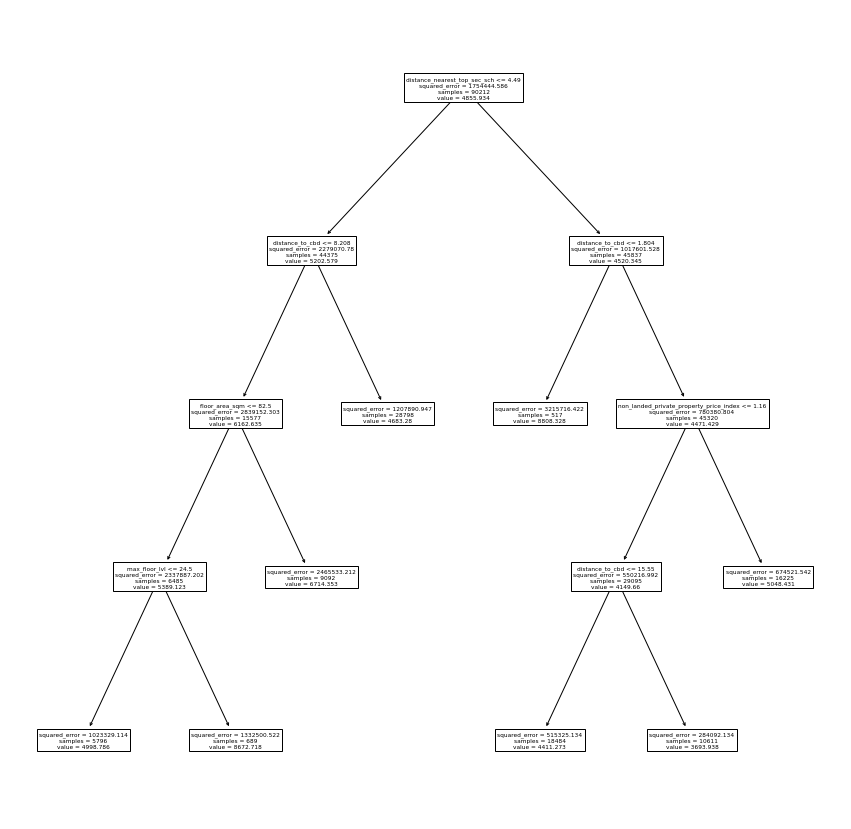

In [17]:
plt.figure(figsize = (15,15))
plot_tree(reg_tree, feature_names = features)

In [18]:
y_pred_tree = reg_tree.predict(X_test)
((y_pred_tree-y_test)**2).mean()

982200.5455522528

In [19]:
n_folds = 10

kf = KFold(n_folds, random_state = 1, shuffle = True)
kf.get_n_splits(X_train)

10

In [20]:
# Cross validation
max_nodes = 20
ErrCV = np.zeros((max_nodes, n_folds))
f = 0

for train_idx, test_idx in kf.split(X_train):
    X_train_, Y_train_ = X_train.loc[train_idx, :], y_train[train_idx]
    X_cv, Y_cv= X_train.loc[test_idx, :], y_train[test_idx]
    
    for nn in range(1, max_nodes+1):
        try:
            reg_tree = DecisionTreeRegressor(random_state = nn, max_leaf_nodes = nn) # max terminal nodes or max depth?
            reg_tree.fit(X_train_, Y_train_)
            y_pred = reg_tree.predict(X_cv)
            ErrCV[nn-1, f] = sum((Y_cv - y_pred)**2)
        except:
            ErrCV[nn-1, f] = sum(Y_cv**2) # Check for the correct error value
    f += 1
ErrCV = ErrCV.mean(axis = 1)

Text(0, 0.5, 'SSR')

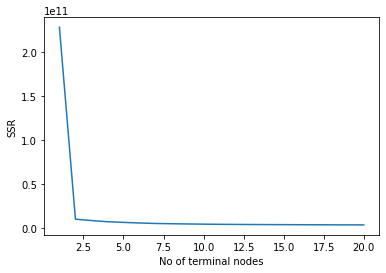

In [21]:
# Plot average CV error
sns.lineplot(x = np.arange(1, max_nodes+1), y = ErrCV)
plt.xlabel("No of terminal nodes")
plt.ylabel("SSR")

In [22]:
# Python indexing starts from 0
cv_max_nodes = np.argmin(ErrCV)+1

In [23]:
cv_max_nodes

20

[Text(0.734375, 0.9375, 'max_floor_lvl <= 27.5\nsquared_error = 1754444.586\nsamples = 90212\nvalue = 4855.934'),
 Text(0.5520833333333334, 0.8125, 'lease_commence_date <= 2004.5\nsquared_error = 1015086.201\nsamples = 84347\nvalue = 4646.157'),
 Text(0.3958333333333333, 0.6875, 'distance_to_cbd <= 8.781\nsquared_error = 784173.168\nsamples = 65045\nvalue = 4415.445'),
 Text(0.20833333333333334, 0.5625, 'max_floor_lvl <= 16.5\nsquared_error = 1011535.851\nsamples = 14081\nvalue = 5285.387'),
 Text(0.125, 0.4375, '3room_sold <= 79.5\nsquared_error = 822624.603\nsamples = 10369\nvalue = 5071.736'),
 Text(0.08333333333333333, 0.3125, 'Longitude <= 103.876\nsquared_error = 865765.26\nsamples = 5529\nvalue = 5373.799'),
 Text(0.041666666666666664, 0.1875, 'squared_error = 770980.636\nsamples = 3783\nvalue = 5625.469'),
 Text(0.125, 0.1875, 'squared_error = 636562.328\nsamples = 1746\nvalue = 4828.513'),
 Text(0.16666666666666666, 0.3125, 'squared_error = 550043.596\nsamples = 4840\nvalue = 

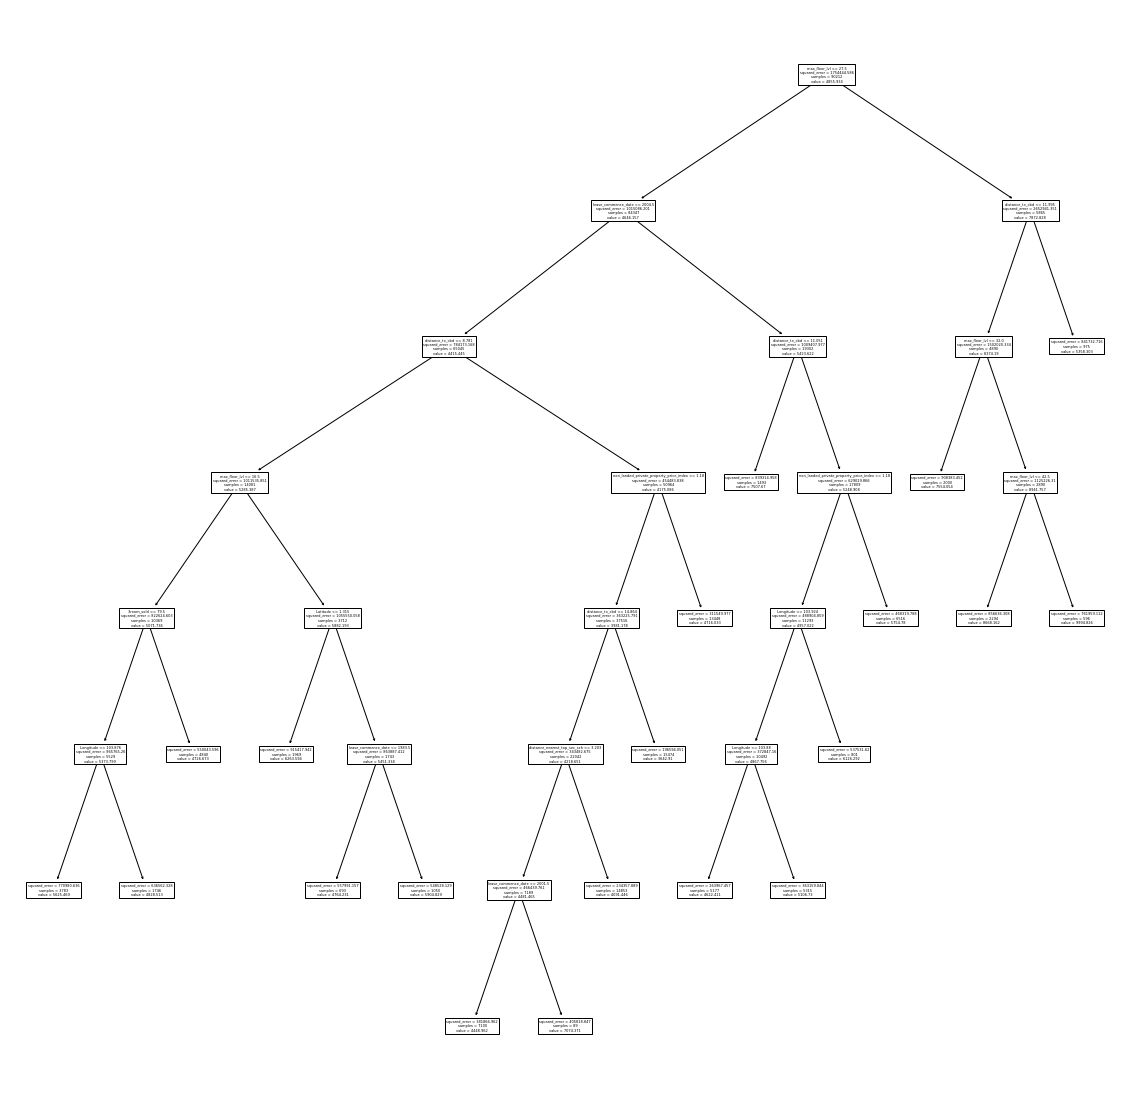

In [24]:
# prune tree

prune_reg_tree = DecisionTreeRegressor(random_state = cv_max_nodes, max_leaf_nodes = cv_max_nodes)
prune_reg_tree.fit(X_train, y_train)

plt.figure(figsize = (20,20))
plot_tree(prune_reg_tree, feature_names = features)
# Plot prune tree with text

In [25]:
y_pred = prune_reg_tree.predict(X_test)
((y_pred-y_test)**2).mean()

400563.44877988554

<b>Random Forest (Ensemble Method)

In [26]:
rf_reg_bag = RandomForestRegressor(max_features = "sqrt", n_estimators = 100, random_state = seed, oob_score = True)
rf_reg_bag.fit(X_train, y_train)
y_pred = rf_reg_bag.predict(X_train)

print("Mean of squared residuals:", mean_squared_error(y_train, y_pred))

Mean of squared residuals: 12057.704773027992


In [27]:
12057.704773027992**0.5

109.80758067195539

In [28]:
features = X_train.columns
importances = rf_reg_bag.feature_importances_
#print(pd.DataFrame({"Features":features, "Importance":importances}))

In [29]:
pd.DataFrame({"Features":features, "Importance":importances}).sort_values(by='Importance', ascending=False).iloc[:20]

,Features,Importance
3,max_floor_lvl,0.128034
1,lease_commence_date,0.112355
30,distance_to_cbd,0.102690
2,remaining_lease,0.100134
20,Latitude,0.085696
33,non_landed_private_property_price_index,0.047915
31,distance_nearest_top_sec_sch,0.041347
37,storey,0.040726
25,number_of_hawker_with_2km,0.040375
21,Longitude,0.038146


Text(0.5, 0, 'Gini importance')

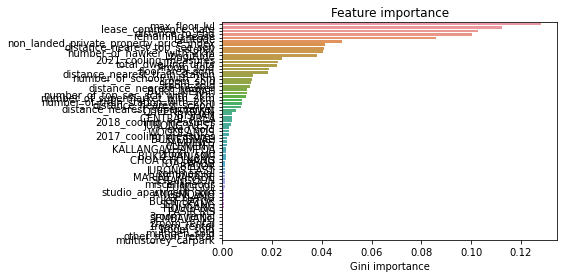

In [30]:
idx = np.argsort(importances)[::-1]

sns.barplot(x = importances[idx], y = features[idx])
plt.title("Feature importance")
plt.xlabel("Gini importance")

In [31]:
y_pred_rf = rf_reg_bag.predict(X_test)
((y_test - y_pred_rf)**2).mean()

82616.23562312372

In [32]:
mean_squared_error(y_test,y_pred_rf)

82616.23562312372

In [33]:
82616.23562312372**0.5

287.43040135504754

<b> visualization

In [34]:
df

,month,town,flat_type,block,street_name,concat_address,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_quater,concat_for_rent,Median Rent,max_floor_lvl,commercial,miscellaneous,multistorey_carpark,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Latitude,Longitude,distance_nearest_school,number_of_school_with_2km,distance_nearest_hawker,number_of_hawker_with_2km,distance_nearest_supermarket,number_of_supermarket_with_2km,distance_nearest_train_station,number_of_train_station_with_2km,distance_to_cbd,distance_nearest_top_sec_sch,number_of_top_sec_sch_with_2km,gdp_growth_rate,unemployment_rate,cpi,sibor_3m,non_landed_private_property_price_index,2017_cooling_measures,2018_cooling_measures,2021_cooling_measures,storey,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,GEYLANG,HOUGANG,JURONG EAST,JURONG WEST,KALLANG/WHAMPOA,MARINE PARADE,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,406 ANG MO KIO AVE 10,44.0,Improved,1979,61.33,5272.727273,2017-Q1,2017-Q1ANG MO KIO2 ROOM,NaN,12,0,0,0,220,0,81,0,0,0,0,0,0,0,139,0,0,1.362005,103.853880,0.227902,21,0.186107,9,0.748674,16,1.007304,3,8.740633,1.285543,1,4.7,2.3,1.8,0.964908,1.000000,0,0,0,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,108 ANG MO KIO AVE 4,67.0,New Generation,1978,60.58,3731.343284,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,12,1,0,0,122,0,0,89,31,1,0,0,0,0,0,1,0,1.370966,103.838202,0.300986,18,0.405496,8,0.384099,14,1.271403,2,9.835487,0.519774,2,4.7,2.3,1.8,0.964908,1.000000,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,602 ANG MO KIO AVE 5,67.0,New Generation,1980,62.42,3910.447761,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,12,0,0,0,150,0,0,124,22,1,3,0,0,0,0,0,0,1.380709,103.835368,0.506849,11,0.592425,6,0.860318,9,1.069723,2,10.948660,0.809241,1,4.7,2.3,1.8,0.964908,1.000000,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,465 ANG MO KIO AVE 10,68.0,New Generation,1980,62.08,3897.058824,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,14,1,0,0,206,0,0,176,26,1,1,0,0,0,0,2,0,1.366201,103.857201,0.518559,17,0.244530,8,0.526652,17,0.946888,3,9.223354,1.868843,1,4.7,2.3,1.8,0.964908,1.000000,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,601 ANG MO KIO AVE 5,67.0,New Generation,1980,62.42,3955.223881,2017-Q1,2017-Q1ANG MO KIO3 ROOM,1750.0,12,1,1,0,152,0,0,128,22,0,2,0,0,0,0,0,0,1.381041,103.835132,0.546443,11,0.617715,6,0.905482,9,1.092582,1,10.989224,0.842134,1,4.7,2.3,1.8,0.964908,1.000000,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134640,2022-09-01,YISHUN,4 ROOM,512C,YISHUN ST 51,512C YISHUN ST 51,93.0,Model A,2017,94.00,5493.419355,2022-Q3,2022-Q3YISHUN4 ROOM,NaN,13,0,1,0,120,0,0,0,48,72,0,0,0,0,0,0,0,1.414958,103.842655,0.409101,5,1.136485,1,0.315535,9,1.109043,1,14.622899,4.681075,0,NaN,NaN,NaN,NaN,1.352765,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
134641,2022-09-01,YISHUN,4 ROOM,759,YISHUN ST 72,759 YISHUN ST 72,84.0,Simplified,1985,62.17,4702.380952,2022-Q3,2022-Q3YISHUN4 ROOM,NaN,12,1,0,0,132,0,0,0,132,0,0,0,0,0,0,0,0,1.426246,103.833234,0.350842,13,0.777123,1,0.093764,15,0.428491,2,15.966511,5.836047,0,NaN,NaN,NaN,NaN,1.352765,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

<AxesSubplot:xlabel='flat_type', ylabel='floor_area_sqm'>

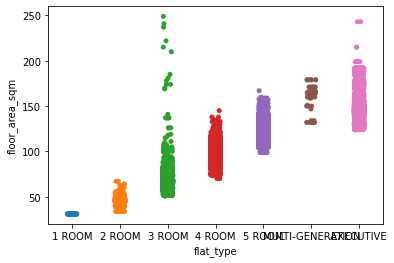

In [35]:
sns.stripplot(data=df, x="flat_type", y="floor_area_sqm", order=['1 ROOM', '2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'MULTI-GENERATION', 'EXECUTIVE'])

In [36]:
df[(df['flat_type'] == '3 ROOM') & (df['floor_area_sqm'] >150)]

,month,town,flat_type,block,street_name,concat_address,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_quater,concat_for_rent,Median Rent,max_floor_lvl,commercial,miscellaneous,multistorey_carpark,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Latitude,Longitude,distance_nearest_school,number_of_school_with_2km,distance_nearest_hawker,number_of_hawker_with_2km,distance_nearest_supermarket,number_of_supermarket_with_2km,distance_nearest_train_station,number_of_train_station_with_2km,distance_to_cbd,distance_nearest_top_sec_sch,number_of_top_sec_sch_with_2km,gdp_growth_rate,unemployment_rate,cpi,sibor_3m,non_landed_private_property_price_index,2017_cooling_measures,2018_cooling_measures,2021_cooling_measures,storey,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,GEYLANG,HOUGANG,JURONG EAST,JURONG WEST,KALLANG/WHAMPOA,MARINE PARADE,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
7000,2017-05-01,KALLANG/WHAMPOA,3 ROOM,59,JLN MA'MOR,59 JLN MA'MOR,181.0,Terrace,1972,54.17,4475.138122,2017-Q2,2017-Q2KALLANG/WHAMPOA3 ROOM,1900.0,2,0,0,0,7,0,0,7,0,0,0,0,0,0,0,0,0,1.328110,103.857126,0.351915,7,0.881094,2,0.148118,10,0.268962,3,5.029946,1.845710,2,3.8,2.2,2.2,0.996757,0.999253,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8868,2017-06-01,KALLANG/WHAMPOA,3 ROOM,38,JLN BAHAGIA,38 JLN BAHAGIA,215.0,Terrace,1972,54.08,3860.465116,2017-Q2,2017-Q2KALLANG/WHAMPOA3 ROOM,1900.0,2,0,0,0,8,0,0,8,0,0,0,0,0,0,0,0,0,1.326906,103.856487,0.126639,6,0.738065,9,0.391835,27,0.490392,7,4.889084,1.820662,1,3.8,2.2,1.7,0.994834,0.999253,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
19693,2017-12-01,KALLANG/WHAMPOA,3 ROOM,65,JLN MA'MOR,65 JLN MA'MOR,249.0,Terrace,1972,53.58,4232.481928,2017-Q4,2017-Q4KALLANG/WHAMPOA3 ROOM,1900.0,2,0,0,0,6,0,0,6,0,0,0,0,0,0,0,0,0,1.328204,103.857972,0.518842,8,0.661698,6,0.204897,16,0.986301,1,5.053249,1.879529,2,4.7,2.1,1.5,1.246805,1.013453,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
27292,2018-05-01,KALLANG/WHAMPOA,3 ROOM,44,JLN BAHAGIA,44 JLN BAHAGIA,185.0,Terrace,1972,53.17,5232.432432,2018-Q2,2018-Q2KALLANG/WHAMPOA3 ROOM,1900.0,2,0,0,0,4,0,0,4,0,0,0,0,0,0,0,0,0,1.327409,103.857231,0.518554,8,0.546061,6,0.300670,15,0.947225,2,4.954727,1.879987,2,5.1,2.1,1.3,1.509458,1.091928,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
29231,2018-06-01,KALLANG/WHAMPOA,3 ROOM,58,JLN MA'MOR,58 JLN MA'MOR,174.0,Terrace,1972,53.17,5459.770115,2018-Q2,2018-Q2KALLANG/WHAMPOA3 ROOM,1900.0,2,0,0,0,7,0,0,7,0,0,0,0,0,0,0,0,0,1.328361,103.857167,0.592482,8,0.640215,6,0.294866,16,1.041923,2,5.058072,1.842588,2,5.1,2.1,1.5,1.519451,1.091928,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
35797,2018-09-01,KALLANG/WHAMPOA,3 ROOM,41,JLN BAHAGIA,41 JLN BAHAGIA,237.0,Terrace,1972,52.83,5000.000000,2018-Q3,2018-Q3KALLANG/WHAMPOA3 ROOM,1900.0,2,0,0,0,8,0,0,8,0,0,0,0,0,0,0,0,0,1.327014,103.856571,0.557088,8,0.477557,6,0.286169,14,0.951939,2,4.902064,1.825189,1,3.2,2.1,1.6,1.638848,1.091928,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
53491,2019-07-01,KALLANG/WHAMPOA,3 ROOM,42,JLN BAHAGIA,42 JLN BAHAGIA,169.0,Terrace,1972,52.25,5769.230769,2019-Q3,2019-Q3KALLANG/WHAMPOA3 ROOM,1900.0,2,0,0,0,8,0,0,8,0,0,0,0,0,0,0,0,0,1.327150,103.856962,0.527023,8,0.507558,6,0.283157,14,0.939127,2,4.922366,1.861031,1,0.7,2.2,0.5,1.998360,1.121076,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
79015,2020-09-01,KALLANG/WHAMPOA,3 ROOM,55,JLN BAHAGIA,55 JLN BAHAGIA,170.0,Terrace,1972,50.83,5882.352941,2020-Q3,2020-Q3KALLANG/WHAMPOA3 ROOM,1900.0,2,0,0,0,8,0,0,8,0,0,0,0,0,0,0,0,0,1.328041,103.856666,0.610992,8,0.586918,6,0.350704,15,1.039735,2,5.016074,1.798834,1,-4.6,3.4,-0.1,0.407296,1.112108,0,1,0,2,0,0,0,0,0,0,0,0,0

In [37]:
df[df['flat_model'] == 'Terrace']

,month,town,flat_type,block,street_name,concat_address,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year_quater,concat_for_rent,Median Rent,max_floor_lvl,commercial,miscellaneous,multistorey_carpark,total_dwelling_units,1room_sold,2room_sold,3room_sold,4room_sold,5room_sold,exec_sold,multigen_sold,studio_apartment_sold,1room_rental,2room_rental,3room_rental,other_room_rental,Latitude,Longitude,distance_nearest_school,number_of_school_with_2km,distance_nearest_hawker,number_of_hawker_with_2km,distance_nearest_supermarket,number_of_supermarket_with_2km,distance_nearest_train_station,number_of_train_station_with_2km,distance_to_cbd,distance_nearest_top_sec_sch,number_of_top_sec_sch_with_2km,gdp_growth_rate,unemployment_rate,cpi,sibor_3m,non_landed_private_property_price_index,2017_cooling_measures,2018_cooling_measures,2021_cooling_measures,storey,ANG MO KIO,BEDOK,BISHAN,BUKIT BATOK,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL AREA,CHOA CHU KANG,CLEMENTI,GEYLANG,HOUGANG,JURONG EAST,JURONG WEST,KALLANG/WHAMPOA,MARINE PARADE,PASIR RIS,PUNGGOL,QUEENSTOWN,SEMBAWANG,SENGKANG,SERANGOON,TAMPINES,TOA PAYOH,WOODLANDS,YISHUN
3187,2017-03-01,KALLANG/WHAMPOA,3 ROOM,53,JLN MA'MOR,53 JLN MA'MOR,111.0,Terrace,1972,54.33,6756.756757,2017-Q1,2017-Q1KALLANG/WHAMPOA3 ROOM,1950.0,2,0,0,0,8,0,0,8,0,0,0,0,0,0,0,0,0,1.328279,103.856097,0.416485,16,0.916456,2,0.213732,22,0.308298,2,5.035055,1.730671,1,4.7,2.3,2.0,0.942560,1.000000,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3467,2017-03-01,QUEENSTOWN,3 ROOM,56,STIRLING RD,56 STIRLING RD,108.0,Terrace,1968,50.33,8055.555556,2017-Q1,2017-Q1QUEENSTOWN3 ROOM,2000.0,2,0,0,0,8,0,0,8,0,0,0,0,0,0,0,0,0,1.296696,103.804270,0.380391,16,0.276196,4,0.208270,13,0.757944,3,5.448788,2.771084,0,4.7,2.3,2.0,0.942560,1.000000,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3468,2017-03-01,QUEENSTOWN,3 ROOM,55,STIRLING RD,55 STIRLING RD,84.0,Terrace,1968,50.33,10582.010476,2017-Q1,2017-Q1QUEENSTOWN3 ROOM,2000.0,2,0,0,0,6,0,0,6,0,0,0,0,0,0,0,0,0,1.296589,103.804175,0.266907,18,0.786564,3,0.532322,13,0.630806,3,5.455581,2.764372,0,4.7,2.3,2.0,0.942560,1.000000,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7000,2017-05-01,KALLANG/WHAMPOA,3 ROOM,59,JLN MA'MOR,59 JLN MA'MOR,181.0,Terrace,1972,54.17,4475.138122,2017-Q2,2017-Q2KALLANG/WHAMPOA3 ROOM,1900.0,2,0,0,0,7,0,0,7,0,0,0,0,0,0,0,0,0,1.328110,103.857126,0.351915,7,0.881094,2,0.148118,10,0.268962,3,5.029946,1.845710,2,3.8,2.2,2.2,0.996757,0.999253,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
7233,2017-05-01,QUEENSTOWN,3 ROOM,53,STIRLING RD,53 STIRLING RD,78.0,Terrace,1968,50.17,9935.897436,2017-Q2,2017-Q2QUEENSTOWN3 ROOM,2000.0,2,0,0,0,6,0,0,6,0,0,0,0,0,0,0,0,0,1.296646,103.803619,0.585172,19,0.081753,10,0.063448,14,0.376786,2,5.516811,2.703285,0,3.8,2.2,2.2,0.996757,0.999253,1,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122110,2022-03-01,KALLANG/WHAMPOA,3 ROOM,38,JLN BAHAGIA,38 JLN BAHAGIA,83.0,Terrace,1972,49.42,9638.554217,2022-Q1,2022-Q1KALLANG/WHAMPOA3 ROOM,NaN,2,0,0,0,8,0,0,8,0,0,0,0,0,0,0,0,0,1.326906,103.856487,0.559803,8,0.463194,6,0.280192,14,0.947996,2,4.889084,1.820662,1,3.8,2.2,5.9,0.666473,1.254858,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
128696,2022-06-01,KALLANG/WHAMPOA,3 ROOM,50,JLN BAHAGIA,50 JLN BAHAGIA,89.0,Terrace,1972,49.08,9887.640449,2022-Q2,2022-Q2KALLANG/WHAMPOA3 ROOM,NaN,2,0,0,0,6,0,0,6,0,0,0,0,0,0,0,0,0,1.327685,103.856229,0.627670,8,0.529251,6,0.369568,14,1.034316,2,4.971438,1.764544,1,4.5,2.1,7.4,1.508507,1.299701,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
130886,2022-07-01,KALLANG/WHAMPOA,3 ROOM

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [39]:
df_mean = pd.pivot_table(df[['month', 'resale_price']], values='resale_price', index='month', aggfunc = np.mean).reset_index()
df_mean

,month,resale_price
0,2017-01-01,4523.774290
1,2017-02-01,4585.072230
2,2017-03-01,4624.392670
3,2017-04-01,4564.304184
4,2017-05-01,4592.097633
...,...,...
64,2022-05-01,5717.425980
65,2022-06-01,5749.791177
66,2022-07-01,5775.626068
67,2022-08-01,5728.102178


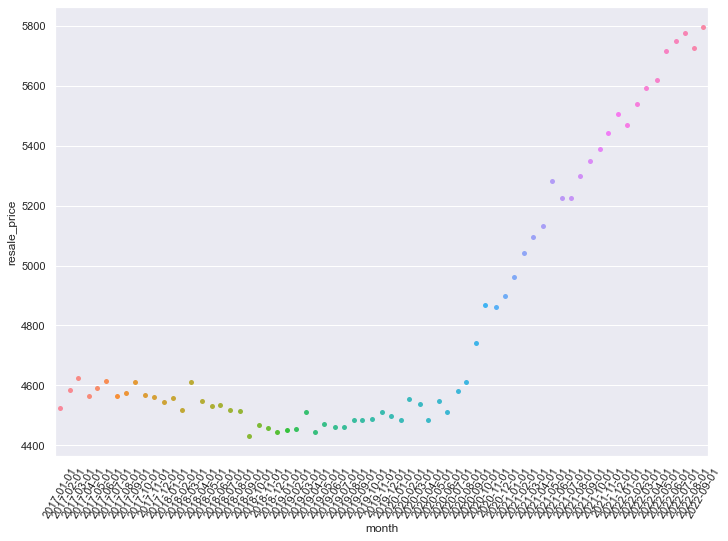

In [40]:
g = sns.stripplot(x=df_mean['month'].apply(lambda x: x.date()), y=df_mean["resale_price"])
g.tick_params(axis='x', rotation=60)

[Text(0.5, 0, 'month-year'),
 Text(0, 0.5, 'resale price per square feet (SGD)')]

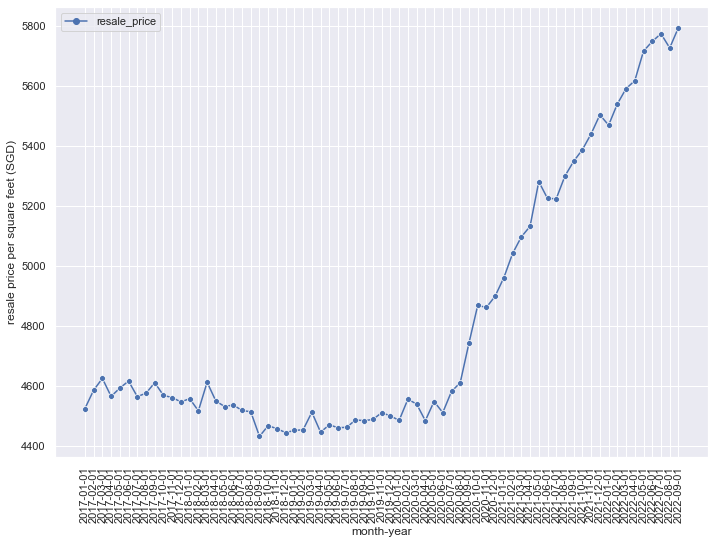

In [41]:
g_mean = sns.lineplot(data = df_mean,markers=True)
g_mean.set_xticks([i for i in range(69)], df_mean['month'].apply(lambda x: x.date()).values)
g_mean.tick_params(axis='x', rotation=90)
g_mean.set(xlabel='month-year', ylabel='resale price per square feet (SGD)')